### Step 0: Merge all csv files

In [6]:
import pandas as pd
import os

# Define the folder containing prediction CSVs
folder_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction"

# List of individual output files
filenames = [
    "chartgemma_2_92b_find_extremum_output.csv",
    "chatgpt_4o_find_extremum_output.csv",
    "gemini_2_5_flash_find_extremum_output.csv",
    "gemini_2_5_pro_find_extremum_output.csv"
]

# Read and concatenate all CSVs into one DataFrame
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in filenames]
merged_df = pd.concat(dfs, ignore_index=True)

# Save merged DataFrame to CSV
output_csv = os.path.join(folder_path, "find_extreum_all_models.csv")
merged_df.to_csv(output_csv, index=False)

print(f"✅ Merged CSV saved to: {output_csv}")


✅ Merged CSV saved to: /Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/find_extreum_all_models.csv


## Step 1: Load dataset



In [7]:
import pandas as pd

find_extremum_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/find_extreum_all_models.csv")

len(find_extremum_df)

200

## 2: Check number of each individual of dataset

In [9]:
chart_gemma_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/chartgemma_2_92b_find_extremum_output.csv")
chart_gpt_4o_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/chatgpt_4o_find_extremum_output.csv")
gemini_2_5_flash_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/gemini_2_5_flash_find_extremum_output.csv")
gemini_2_5_pro_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/gemini_2_5_pro_find_extremum_output.csv")  

print("✅ Total rows in chartgemma:", len(chart_gemma_df))
print("✅ Total rows in chatgpt_4o:", len(chart_gpt_4o_df))
print("✅ Total rows in gemini_2_5_flash:", len(gemini_2_5_flash_df))
print("✅ Total rows in gemini_2_5_pro:", len(gemini_2_5_pro_df))


✅ Total rows in chartgemma: 50
✅ Total rows in chatgpt_4o: 50
✅ Total rows in gemini_2_5_flash: 50
✅ Total rows in gemini_2_5_pro: 50


## 3: Check unique value and clean models for each dataset

### 1: Chart Gemma

In [10]:
chart_gemma_df['Prediction'].unique()

import re

# List of months
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Regex pattern to match the month at the end of the string (optional period and newline)
month_pattern = r"({})\.?$".format("|".join(months))

# Function to extract the month at the end of a sentence
def extract_month(text):
    match = re.search(month_pattern, text.strip())
    return match.group(1) if match else "Unknown"

# Replace the Prediction column directly with the extracted answer
chart_gemma_df['Prediction'] = chart_gemma_df['Prediction'].apply(extract_month)

# Show unique cleaned answers
print("✅ Cleaned ChartGemma Answers:")

print(chart_gemma_df['Prediction'].unique())


✅ Cleaned ChartGemma Answers:
['March' 'December']


### 2: ChatGPT, Gemini Datasets

In [11]:
print("✅ Unique values in chart_gpt_4o_df['Prediction']:", chart_gpt_4o_df['Prediction'].unique())
print("✅ Unique values in gemini_2_5_flash_df['Prediction']:", gemini_2_5_flash_df['Prediction'].unique())
print("✅ Unique values in gemini_2_5_pro_df['Prediction']:", gemini_2_5_pro_df['Prediction'].unique())

✅ Unique values in chart_gpt_4o_df['Prediction']: ['December' 'March' 'December.']
✅ Unique values in gemini_2_5_flash_df['Prediction']: ['December']
✅ Unique values in gemini_2_5_pro_df['Prediction']: ['December']


In [12]:
# Remove trailing period and extra spaces
chart_gpt_4o_df['Prediction'] = chart_gpt_4o_df['Prediction'].str.strip().str.rstrip('.')

print("✅ Cleaned Unique Predictions:")
print(chart_gpt_4o_df['Prediction'].unique())


✅ Cleaned Unique Predictions:
['December' 'March']


## 4: Merge dataset, and check total number of dataset

In [13]:
merged_df = pd.concat([chart_gemma_df, chart_gpt_4o_df, gemini_2_5_flash_df, gemini_2_5_pro_df], ignore_index=True)

merged_df.to_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/find_extreum_all_models.csv", index=False)

print("Total rows in merged dataset:", len(merged_df))

Total rows in merged dataset: 200


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 200 non-null    object 
 1   Question Type         200 non-null    object 
 2   Question Description  200 non-null    object 
 3   Prompt                200 non-null    object 
 4   Model Name            200 non-null    object 
 5   Color                 200 non-null    object 
 6   Chart Title           200 non-null    object 
 7   Image Path            200 non-null    object 
 8   Ground Truth          200 non-null    object 
 9   Prediction            200 non-null    object 
 10  Answer Time           200 non-null    float64
dtypes: float64(1), object(10)
memory usage: 17.3+ KB


## 5: Visualization

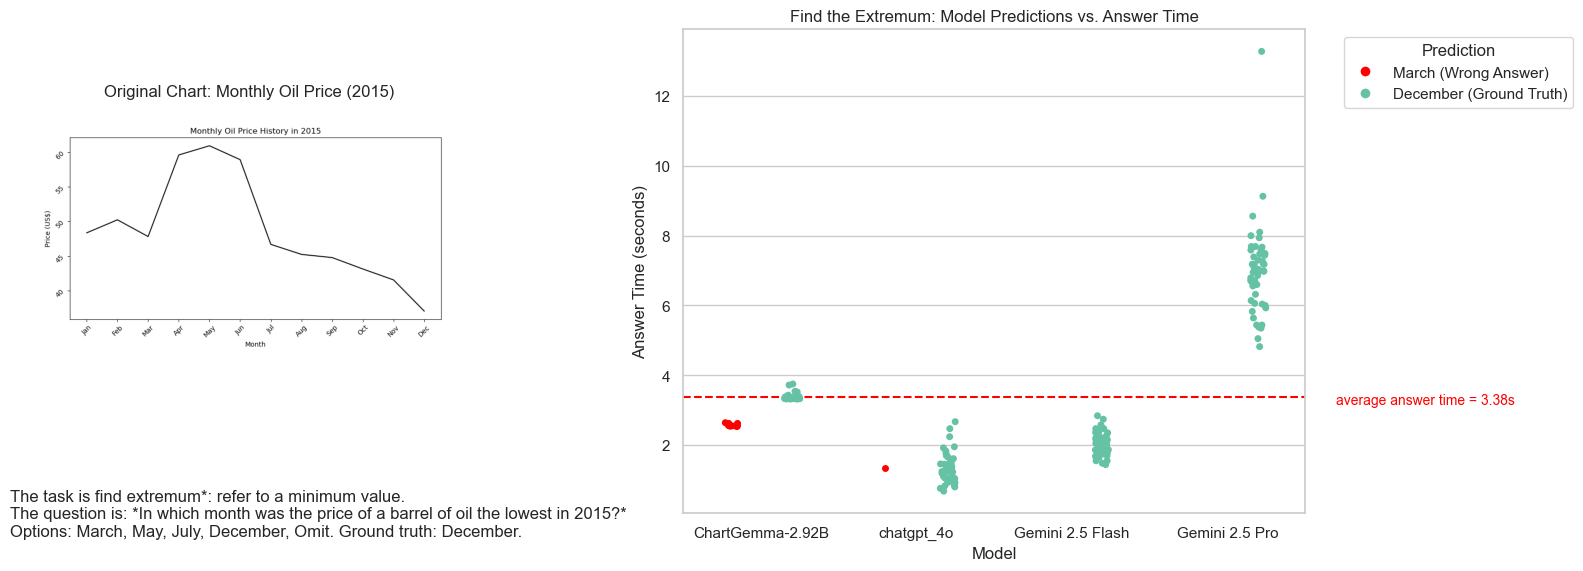

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.lines import Line2D

# Clean Prediction column
merged_df['Prediction'] = merged_df['Prediction'].str.strip().str.rstrip('.')
merged_df['Prediction'] = merged_df['Prediction'].replace("December", "December (Ground Truth)")

# Calculate average answer time
avg_time = merged_df['Answer Time'].mean()

# Color palette
palette_custom = {
    'March': 'red',
    'December (Ground Truth)': '#66c2a5'
}

# Load chart image
image_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/find_extreum_images/find_extremum_line_Monthly_Oil_Price_History_in_2015_black.png"
img = mpimg.imread(image_path)

# Create side-by-side layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.3]})

# --- Left: Chart image
ax1.imshow(cropped_array)
ax1.axis('off')
ax1.set_title("Original Chart: Monthly Oil Price (2015)", fontsize=12)

pos1 = ax1.get_position()  # Get original position
ax1.set_position([pos1.x0, pos1.y0 - 0.03, pos1.width, pos1.height])

# Caption under the image
caption = ("The task is find extremum: refer to a minimum value.\n"
           "The question is: *In which month was the price of a barrel of oil the lowest in 2015?*\n"
           "Options: March, May, July, December, Omit. Ground truth: December.")

ax1.text(
    0.0, -0.15, caption,
    ha='left',
    va='top',
    fontsize=12,
    transform=ax1.transAxes,
    wrap=True
)

# --- Right: Seaborn chart
sns.stripplot(
    data=merged_df,
    x='Model Name',
    y='Answer Time',
    hue='Prediction',
    dodge=True,
    jitter=True,
    palette=palette_custom,
    ax=ax2
)

ax2.set_title("Find the Extremum: Model Predictions vs. Answer Time", fontsize=12)
ax2.set_ylabel("Answer Time (seconds)")
ax2.set_xlabel("Model")

# Add average line and label
ax2.axhline(y=avg_time, color='red', linestyle='--', linewidth=1.5)
ax2.text(
    x=len(merged_df['Model Name'].unique()) - 0.3,
    y=avg_time - 0.3,
    s=f"average answer time = {avg_time:.2f}s",
    color='red',
    fontsize=10,
    ha='left',
    va='bottom'
)

# Custom legend
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='March (Wrong Answer)', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='December (Ground Truth)', markerfacecolor='#66c2a5', markersize=8)
]
ax2.legend(handles=custom_legend, title='Prediction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Filter and get only the rows where ChatGPT, and ChartGemma contains "March"

In [19]:
march_rows_chatgpt = chart_gpt_4o_df[chart_gpt_4o_df['Prediction'].str.strip() == 'March']

march_rows_chatgpt



,Index,Question Type,Question Description,Prompt,Model Name,Color,Chart Title,Image Path,Ground Truth,Prediction,Answer Time
18,img4_run4,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,chatgpt_4o,lightgray,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,1.35


In [20]:
march_rows_chart_gemma = chart_gemma_df[chart_gemma_df['Prediction'].str.strip() == 'March']

march_rows_chart_gemma


,Index,Question Type,Question Description,Prompt,Model Name,Color,Chart Title,Image Path,Ground Truth,Prediction,Answer Time
0,img1_run1,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,black,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.62
1,img1_run2,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,black,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.62
2,img1_run3,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,black,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.64
3,img1_run4,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,black,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.61
4,img1_run5,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,black,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.53
15,img4_run1,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,lightgray,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.55
16,img4_run2,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,lightgray,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.54
17,img4_run3,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,lightgray,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.56
18,img4_run4,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,lightgray,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.55
19,img4_run5,Find Extremum,In which month was the price of a barrel of oi...,In which month was the price of a barrel of oi...,ChartGemma-2.92B,lightgray,line_data.csv,/Users/ramihuunguyen/Documents/PhD/Visualizati...,December,March,2.55


In [22]:
len(march_rows_chart_gemma)

10